# DATAJAM: DATEANDO POR EL AGUA

**Equipo:** MPM

**Integrantes**
- Juan José Triviño
- Rónal Ruiz

## Carga de librerias

In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import json
pd.options.display.float_format = '{:,.2f}'.format

## Carga de datos planos

In [2]:
autorizaciones = pd.read_excel("Autorizaciones del Recurso Hídrico.xlsx")
poblacion = pd.read_excel("Proyección Poblacional cantonal 2010-2020.xlsx", skiprows=2)

## Limpieza de Datos

### Eliminar filas y columnas vacias

In [3]:
autorizaciones.dropna(how='all',inplace=True) # filas
autorizaciones.dropna(how='all',inplace=True, axis=1) # columnas

### Reemplazar palabras incorrectas

In [4]:
# Nombre de provincias
dicc_provincias = {'CA¥AR': 'CAÑAR', 'CARCHII': 'CARCHI'}
autorizaciones['PROVINCIA_FUENTE'] = autorizaciones['PROVINCIA_FUENTE'].replace(dicc_provincias)

# Tipos de parroquias
dicc_tipo_parroquia = {'RURRAL': 'RURAL'}
autorizaciones['TIPO_PARROQUIA_FUENTE'] = autorizaciones['TIPO_PARROQUIA_FUENTE'].replace(dicc_tipo_parroquia)

# Estado de trámite
dicc_estado_tramite = {'CA-NCELADO': 'CANCELADO', 'VIGNTE': 'VIGENTE', 'VIGE-NTE': 'VIGENTE', 'VIENTE': 'VIGENTE'}
autorizaciones['ESTADO_TRAMITE'] = autorizaciones['ESTADO_TRAMITE'].replace(dicc_estado_tramite)

### Reemplazar caracteres incorrectos

In [5]:
caracteres = [('¥','Ñ'), ('µ','A'), ('à','O'), ('š','U'), ('Ö','I') , ('\x90', 'E'), ('é', 'U')]
for incorrecto,correcto in caracteres:
        autorizaciones.replace(incorrecto,correcto, regex=True, inplace=True) # Se reemplazan los caracteres incorrectos
for variable in autorizaciones.select_dtypes('object'):
        autorizaciones[variable] = autorizaciones[variable].str.upper() # Se ponen en mayusculas todos los caracteres

### Verificar año del trámite

In [6]:
autorizaciones['ANIO_TRAMITE'] = autorizaciones['CODIGO_PROCESO'].apply(lambda x: int(x[-4:]))

### Cambio de tipos de datos

In [7]:
variables_int = ['CODIGO_DPA_CANTON', 'ANIO', 'NUMERO_PROCESO', 'COTA_FUENTE', 'PFAFSTETTER', 'COORDENADA_X_FUENTE', 'COORDENADA_Y_FUENTE']

for variable in variables_int:
    autorizaciones[variable] = autorizaciones[variable].astype('int')

## Unión de tablas

In [8]:
poblacion.rename(columns={'Código': 'CODIGO_DPA_CANTON'}, inplace=True)
poblacion2020 = poblacion[['CODIGO_DPA_CANTON', 2020]] # Se selecciona el código del cantón y la población en el 2020
consolidado = pd.merge(autorizaciones, poblacion2020, on='CODIGO_DPA_CANTON')
consolidado

ANIO FECHA_REGISTRO REGION_FUENTE NOMBRE_EXDH_DZ  PROVINCIA_FUENTE  \
0    2020     2020-03-13       ORIENTE           NAPO              NAPO   
1    2020     2020-12-12       ORIENTE           NAPO              NAPO   
2    2020     2020-01-07         COSTA     ESMERALDAS        ESMERALDAS   
3    2020     2020-03-18         COSTA     ESMERALDAS        ESMERALDAS   
4    2020     2020-04-27         COSTA     ESMERALDAS        ESMERALDAS   
..    ...            ...           ...            ...               ...   
716  2020     2020-06-29       ORIENTE       SANTIAGO  ZAMORA CHINCHIPE   
717  2020     2020-12-31       ORIENTE       SANTIAGO  ZAMORA CHINCHIPE   
718  2020     2020-12-31       ORIENTE       SANTIAGO  ZAMORA CHINCHIPE   
719  2020     2020-12-31       ORIENTE       SANTIAGO  ZAMORA CHINCHIPE   
720  2020     2020-12-31       ORIENTE       SANTIAGO  ZAMORA CHINCHIPE   

     CODIGO_DPA_CANTON CANTON_FUENTE PARROQUIA_FUENTE TIPO_PARROQUIA_FUENTE  \
0                 1503     ARCHIDONA          COTUNDO                 RURAL   
1                 1503     ARCHIDONA          COTUNDO                 RURAL   
2                  806      ATACAMES         LA UNION                URBANA   
3                  806      ATACAMES        TONCHIGUE                 RURAL   
4                  806      ATACAMES        TONCHIGUE                 RURAL   
..                 ...           ...              ...                   ...   
716               1901        ZAMORA        GUADALUPE                 RURAL   
717               1901        ZAMORA       CUMBARATZA                 RURAL   
718               1901        ZAMORA          TIMBARA                 RURAL   
719               1901        ZAMORA       CUMBARATZA                 RURAL   
720               1901        ZAMORA       CUMBARATZA                 RURAL   

    NOMBRE_EXCAC_OT  ...     NOMBRE_SUB_USO_APROVECHAMIENTO  \
0              TENA  ...      USO EN GENERAL PARA PISCICOLA   
1              TENA  ...     USO EN GENERAL PARA RECREATIVO   
2        ESMERALDAS  ...  EXTENSIVO A OTROS USOS DOMESTICOS   
3        ESMERALDAS  ...             CULTIVOS DE PASTIZALES   
4        ESMERALDAS  ...             CULTIVOS DE PASTIZALES   
..              ...  ...                                ...   
716          ZAMORA  ...                 EXPLOTACION MINERA   
717          ZAMORA  ...                 EXPLOTACION MINERA   
718          ZAMORA  ...   EXPLOTACION DE MATERIALES ARIDOS   
719          ZAMORA  ...                 EXPLOTACION MINERA   
720          ZAMORA  ...   EXPLOTACION DE MATERIALES ARIDOS   

                       GRUPO_USUARIO_AUTORIZADO  TIPO_USUARIO_AUTORIZADO  \
0       PERSONAS NATURALES, HEREDEROS, FAMILIAS               PARTICULAR   
1       PERSONAS NATURALES, HEREDEROS, FAMILIAS               PARTICULAR   
2            CENTROS O INSTITUCIONES EDUCATIVAS                SECCIONAL   
3       PERSONAS NATURALES, HEREDEROS, FAMILIAS               PARTICULAR   
4       PERSONAS NATURALES, HEREDEROS, FAMILIAS               PARTICULAR   
..                                          ...                      ...   
716     PERSONAS NATURALES, HEREDEROS, FAMILIAS               PARTICULAR   
717     PERSONAS NATURALES, HEREDEROS, FAMILIAS               PARTICULAR   
718  EMPRESAS DEDICADAS A LA EXPLOTACION MINERA               PARTICULAR   
719  EMPRESAS DEDICADAS A LA EXPLOTACION MINERA               PARTICULAR   
720  EMPRESAS DEDICADAS A LA EXPLOTACION MINERA               PARTICULAR   

            CODIGO_UNICO     CODIGO_PROCESO ANIO_TRAMITE NUMERO_PROCESO  \
0    NA-TE-000514-114998  NA-TE-000514-2015         2015            514   
1    NA-TE-000877-126320  NA-TE-000877-2016         2016            877   
2    ES-ES-000088-130016  ES-ES-000088-1989         1989             88   
3    ES-ES-000007-111615  ES-ES-000007-2015         2015              7   
4    ES-ES-000364-111614  ES-ES-000364-2007         2007            364   
..                   ...           

### Filtro de autorizaciones

In [9]:
condicion1 = consolidado['ESTADO_TRAMITE'] == 'VIGENTE'
condicion2 = consolidado['NOMBRE_USO_APROVECHAMIENTO'] == 'CONSUMO HUMANO'

consolidado_filtrado = consolidado[condicion1 & condicion2]

### Agrupación por Zonas Geograficas

In [10]:
agrupado = consolidado_filtrado.groupby(['REGION_FUENTE', 'PROVINCIA_FUENTE', 'CANTON_FUENTE'], observed=True).agg(
    NRO_AUTORIZACIONES=('CODIGO_UNICO','count'), POBLACION=(2020,'sum'))

### Creacion del indicador

In [11]:
agrupado['AUT/HAB'] = 10000 * agrupado['NRO_AUTORIZACIONES'] / agrupado['POBLACION']

## Carga de GeoJSON

In [12]:
def normalizar(s):
    replacements = (
        ("á", "a"),
        ("é", "e"),
        ("í", "i"),
        ("ó", "o"),
        ("ú", "u"),
    )
    for a, b in replacements:
        s = s.upper().replace(a, b).replace(a.upper(), b.upper())
    return s

with open('gadm36_ECU_2.json', 'r', encoding='utf8') as myfile:
    data=myfile.read()
   
gj = json.loads(data) # carga del geojson

for k in gj['features']:
    k['properties']['NAME_2'] = normalizar(k['properties']['NAME_2'])

### Creación del mapa cloroplético

In [13]:
def generar_mapa(df, valor, escala_color):
    fig = px.choropleth_mapbox(df, geojson=gj, color=valor, color_continuous_scale=escala_color,
                           locations="CANTON_FUENTE", 
                           featureidkey="properties.NAME_2",
                           hover_data= {valor:':,.2f'},                       
                           center={"lat": -1.5, "lon": -80.7073},
                           mapbox_style="carto-positron", 
                           zoom=5.6,
                           opacity = 0.7,
                           )
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
    fig.show()

In [14]:
df = agrupado.reset_index()

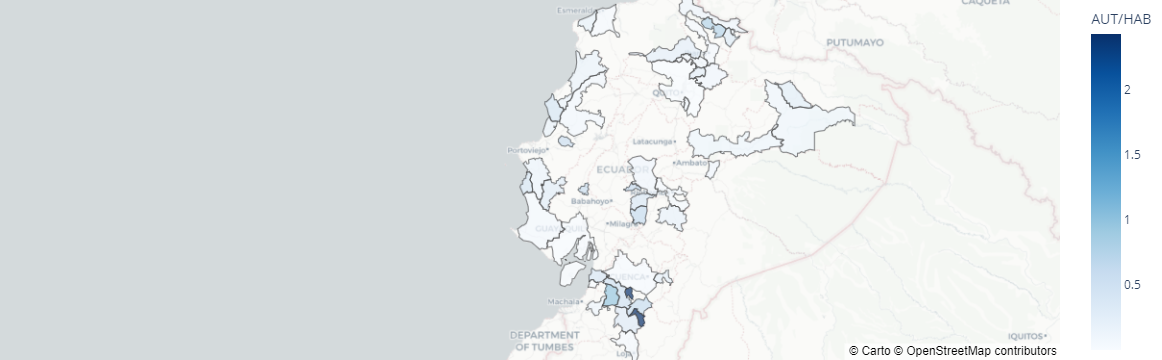

In [15]:
generar_mapa(df, 'AUT/HAB', 'Blues')

In [16]:
agrupado.sort_values('AUT/HAB', ascending=False).iloc[:20]


NRO_AUTORIZACIONES  \
REGION_FUENTE PROVINCIA_FUENTE CANTON_FUENTE                               
SIERRA        AZUAY            OÑA                                     8   
                               SAN FERNANDO                            2   
                               PUCARA                                  1   
              CARCHI           ESPEJO                                  5   
              BOLIVAR          CALUMA                                  1   
                               CHILLANES                               1   
              AZUAY            NABON                                  17   
              BOLIVAR          SAN JOSE DE CHIMBO                      1   
COSTA         GUAYAS           PALESTINA                               1   
              MANABI           JUNIN                                   2   
SIERRA        AZUAY            SANTA ISABEL                            1   
COSTA         MANABI           PUERTO LOPEZ                            2   
                               SAN VICENTE                             1   
              GUAYAS           BALAO                                   1   
SIERRA        BOLIVAR          SAN MIGUEL                              6   
COSTA         ESMERALDAS       RIOVERDE                                1   
SIERRA        LOJA             SARAGURO                               23   
              CARCHI           MONTUFAR                                1   
COSTA         MANABI           PAJAN                                   1   
ORIENTE       ORELLANA         LA JOYA DE LOS SACHAS                   8   

                                                      POBLACION  AUT/HAB  
REGION_FUENTE PROVINCIA_FUENTE CANTON_FUENTE                              
SIERRA        AZUAY            OÑA                        33024     2.42  
                               SAN FERNANDO                8312     2.41  
                               PUCARA                     10584     0.94  
              CARCHI           ESPEJO                     69085     0.72  
              BOLIVAR          CALUMA                     16429     0.61  
                               CHILLANES                  16850     0.59  
              AZUAY            NABON                     293964     0.58  
              BOLIVAR          SAN JOSE DE CHIMBO         17378     0.58  
COSTA         GUAYAS           PALESTINA                  18451     0.54  
              MANABI           JUNIN                      37640     0.53  
SIERRA        AZUAY            SANTA ISABEL               20935     0.48  
COSTA         MANABI           PUERTO LOPEZ               49376     0.41  
                               SAN VICENTE                24799     0.40  
              GUAYAS           BALAO                      26348     0.38  
SIERRA        BOLIVAR          SAN MIGUEL                174024     0.34  
COSTA         ESMERALDAS       RIOVERDE                   31475     0.32  
SIERRA        LOJA             SARAGURO                  770638     0.30  
              CARCHI           MONTUFAR                   34229     0.29  
COSTA         MANABI           PAJAN                      37093     0.27  
ORIENTE       ORELLANA         LA JOYA DE LOS SACHAS     314816     0.25

### Otros gráficos por regiones

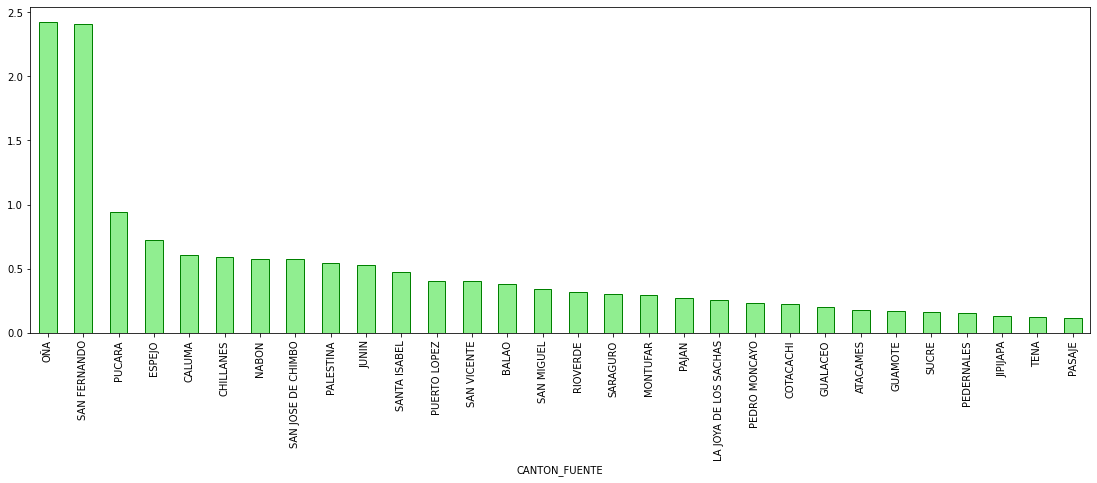

In [17]:
agrupado.sort_values('AUT/HAB', ascending=False).reset_index([0,1])['AUT/HAB'].iloc[:30].plot(
    kind='bar', figsize=(19,6), color='lightgreen', edgecolor='g')
plt.show()

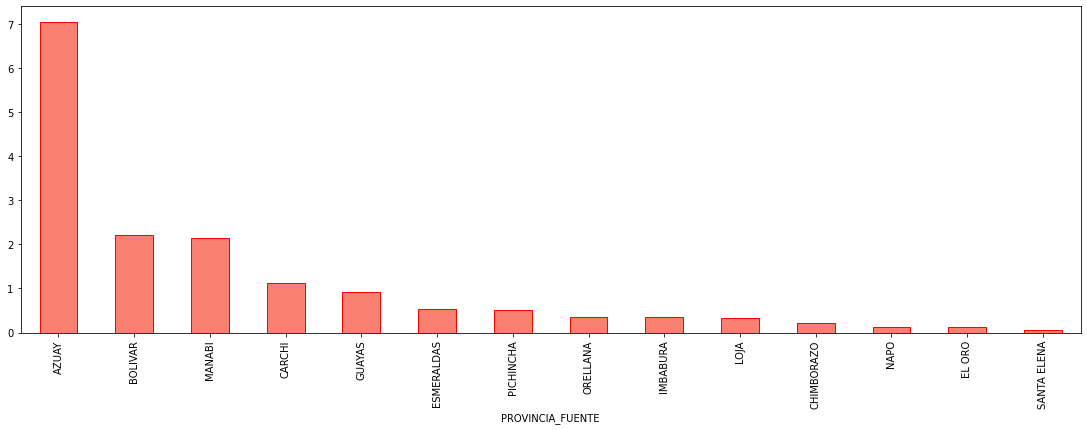

In [18]:
agrupado.reset_index().groupby('PROVINCIA_FUENTE').sum()['AUT/HAB'].sort_values(ascending=False).iloc[:30].plot(
    kind='bar', figsize=(19,6), color='salmon', edgecolor='r')
plt.show()

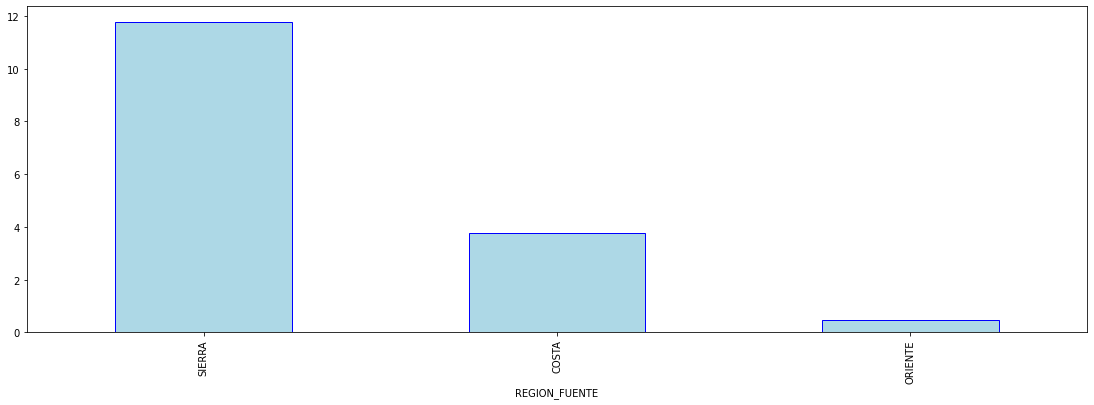

In [19]:
agrupado.reset_index().groupby('REGION_FUENTE').sum()['AUT/HAB'].sort_values(ascending=False).iloc[:30].plot(
    kind='bar', figsize=(19,6), color='lightblue', edgecolor='b')
plt.show()

In [20]:
#autorizaciones.to_excel('Autorizaciones del Recurso Hídrico (LIMPIO).xlsx')